<a href="https://colab.research.google.com/github/Aayushmatkar/AayushMatkar_Resume/blob/main/glaucomaAVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload the Kaggle API key (kaggle.json) that you downloaded
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"priyankapratapmore","key":"b505f1e201b651e9170182e297d0c783"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install kaggle

In [5]:
!kaggle datasets download -d sabari50312/fundus-pytorch

100% 3.81G/3.82G [01:00<00:00, 122MB/s] 
100% 3.82G/3.82G [01:00<00:00, 68.1MB/s]


In [6]:
!unzip -q  fundus-pytorch.zip -d dataset

##using CNN to train

In [7]:
import tensorflow as tf
from keras.api._v2.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/test'

# Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Found 8621 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


Epoch 1/10
100/100 [==============================] - 142s 1s/step - loss: 0.6675 - accuracy: 0.6466 - val_loss: 0.7905 - val_accuracy: 0.5570
Epoch 2/10
100/100 [==============================] - 138s 1s/step - loss: 0.6224 - accuracy: 0.6774 - val_loss: 0.5857 - val_accuracy: 0.7020
Epoch 3/10
100/100 [==============================] - 164s 2s/step - loss: 0.5971 - accuracy: 0.7138 - val_loss: 0.5642 - val_accuracy: 0.7240
Epoch 4/10
100/100 [==============================] - 141s 1s/step - loss: 0.5670 - accuracy: 0.7270 - val_loss: 0.5283 - val_accuracy: 0.7730
Epoch 5/10
100/100 [==============================] - 167s 2s/step - loss: 0.5259 - accuracy: 0.7445 - val_loss: 0.5788 - val_accuracy: 0.7630
Epoch 6/10
100/100 [==============================] - 159s 2s/step - loss: 0.4818 - accuracy: 0.7840 - val_loss: 0.4789 - val_accuracy: 0.7860
Epoch 7/10
100/100 [==============================] - 143s 1s/step - loss: 0.4635 - accuracy: 0.7985 - val_loss: 0.4538 - val_accuracy: 0.8060

## testing the model


In [8]:
from keras.api._v2.keras.preprocessing import image
import numpy as np


img_path = '/content/dataset/val/0/BEH-349.png'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.


#prediction

prediction = model.predict(img_tensor)
print(prediction)

#printing th eresults
if prediction > 0.5:
    print("The model predicts this image is labeled '1'")
else:
    print("The model predicts this image is labeled '0'")


1/1 [==============================] - 0s 170ms/step
The model predicts this image is labeled '0'


Please enter the path to your image: /content/dataset/test/1/BEH-14.png


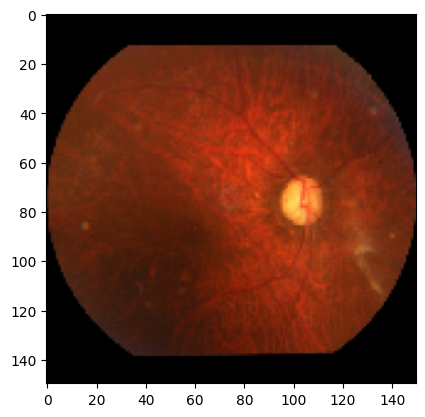

1/1 [==============================] - 0s 87ms/step
[[0.4489205]]
The model predicts this image is labeled '0'


In [12]:
from keras.api._v2.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Get the image path from the user
img_path = input("Please enter the path to your image: ")

# Load the image
img = image.load_img(img_path, target_size=(150, 150))

# Display the image
plt.imshow(img)
plt.show()

# Preprocess the image
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Use the model to predict the label of the new image
prediction = model.predict(img_tensor)
print(prediction)
# Print the prediction
if prediction > 0.5:
    print("The model predicts this image is labeled '1'")
else:
    print("The model predicts this image is labeled '0'")
